<a href="https://colab.research.google.com/github/aschoudry/ML_imageClassifier/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


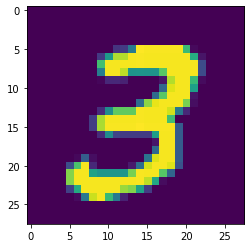

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(x_train[7])

plt.show()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)


In [ ]:
y_test = to_categorical(y_test)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(784,)))
#model.add(tf.keras.layers.Dense(300, activation="relu"))
#model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(30, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 41,090
Trainable params: 41,090
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="Adam",
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Accuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7061 - accuracy: 0.0357 - false_negatives: 27402.0000 - val_loss: 0.7351 - val_accuracy: 0.0674 - val_false_negatives: 2800.0000
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5812 - accuracy: 0.0555 - false_negatives: 14661.0000 - val_loss: 0.4492 - val_accuracy: 0.0565 - val_false_negatives: 1940.0000
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3873 - accuracy: 0.0445 - false_negatives: 7741.0000 - val_loss: 0.3370 - val_accuracy: 0.0183 - val_false_negatives: 1010.0000
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2702 - accuracy: 0.0289 - false_negatives: 5120.0000 - val_loss: 0.2928 - val_accuracy: 0.0279 - val_false_negatives: 854.0000
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2170 - accuracy: 0.0352 - false_negatives: 4069.0000 - val_loss: 0.2319 - val_accuracy: 0.0393 - 

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'false_negatives', 'val_loss', 'val_accuracy', 'val_false_negatives'])


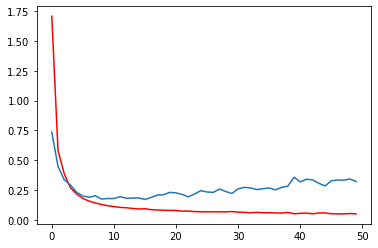

In [ ]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'])

In [ ]:
y_predict[2]

NameError: ignored

In [ ]:
x_test[6].shape

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding='valid'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64, (5,5), activation='relu', padding='valid'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(optimizer="SGD", loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Accuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 63s 33ms/step - loss: 4.9495 - accuracy: 5.1333e-04 - false_negatives: 46590.0000 - val_loss: 0.6069 - val_accuracy: 0.0000e+00 - val_false_negatives: 2688.0000
Epoch 2/50
1875/1875 [==============================] - 61s 33ms/step - loss: 0.5197 - accuracy: 3.3333e-06 - false_negatives: 13122.0000 - val_loss: 0.4106 - val_accuracy: 0.0000e+00 - val_false_negatives: 1666.0000
Epoch 3/50
1875/1875 [==============================] - 61s 32ms/step - loss: 0.3948 - accuracy: 3.3333e-06 - false_negatives: 9399.0000 - val_loss: 0.3538 - val_accuracy: 0.0000e+00 - val_false_negatives: 1381.0000
Epoch 4/50
1875/1875 [==============================] - 61s 33ms/step - loss: 0.3377 - accuracy: 4.6667e-05 - false_negatives: 7936.0000 - val_loss: 0.2986 - val_accuracy: 3.0000e-05 - val_false_negatives: 1104.0000
Epoch 5/50
1875/1875 [==============================] - 61s 33ms/step - loss: 0.3062 - accuracy: 6.0000e-05 - false_negatives: 7040.00

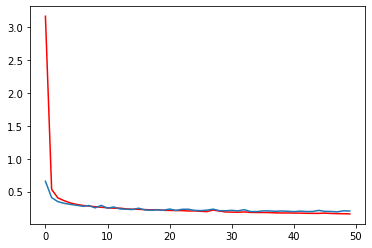

In [14]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'])